In [ ]:
!pip install m2cgen


In [ ]:
import m2cgen as m2c


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
os.chdir("/content/sample_data")

In [ ]:
def file2sentences(filename):
  txt = ""

  with open(filename,"r",encoding="utf-8") as f:
    txt = f.read()

  txt = txt.replace("?",".")
  txt = txt.replace("!",".")
  txt = txt.replace("»","")
  txt = txt.replace("«","")
  txt = txt.replace(":","")
  txt = txt.replace(";","")
  txt = txt.replace("...",".")
  txt = txt.replace("…",".")
  txt = txt.replace("\n",".")
  txt = txt.replace("  "," ")
  txt = txt.replace("“","")
  txt = txt.replace("„","")
  txt = txt.replace("”","")

  sentences = txt.split(".")

  for i in range(len(sentences)):
    sentences[i] = sentences[i].strip()

  sentences = [x for x in sentences if x != ""]

  return sentences

Descargar los txt y colocarlos en una carpeta de colab https://drive.google.com/file/d/1JD2EnUU723c7i73OWiIaV8ovSk0-KWEF/view?usp=sharing

In [ ]:
spanish = file2sentences("espanol.txt")
english = file2sentences("ingles.txt")
#german = file2sentences("also sprach zarathustra.txt")

In [ ]:
spanish[100:110]

['Ahí',
 'tienen el mejor retrato que más tarde logré hacer de él, aunque mi dibujo,',
 'ciertamente es menos encantador que el modelo',
 'Pero no es mía la culpa',
 'Las',
 'personas mayores me desanimaron de mi carrera de pintor a la edad de seis años',
 'y no había aprendido a dibujar otra cosa que boas cerradas y boas abiertas',
 '3',
 'loeré hacer de A',
 'Miré, pues, aquella aparición con los ojos redondos de admiración']

In [ ]:
X = np.array(spanish + english)
y = np.array(['es']*len(spanish) + ['en']*len(english) )

In [ ]:
X.shape

(4382,)

In [ ]:
df = pd.DataFrame({'sentence':X,'language':y})

In [ ]:
df.sample(20)

,sentence,language
3749,And that is sad,en
178,"primera mi avión (no dibujaré mi avión, por tr...",es
651,El principito arrancó también con un poco de m...,es
76,contento de conocer a un hombre tan razonable,es
4170,I could see that he was reviving little by little,en
2192,At a glance I can,en
2198,I have lived a great deal among grown-ups,en
4354,And then the little bells are changed to tears,en
332,El primero estaba habitado por un rey,es
40,digiere un elefante,es


<Axes: xlabel='language'>

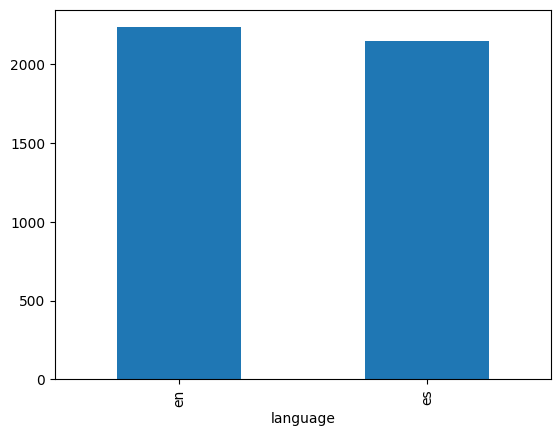

In [ ]:
df['language'].value_counts().plot(kind = 'bar')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
cnt = CountVectorizer(analyzer = 'char',ngram_range=(2,2),binary=True)

cnt.fit(X_train)

len(cnt.get_feature_names_out())

814

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(cnt.transform(X_train),y_train)
y_pred = model.predict(cnt.transform(X_test))

In [ ]:
confusion_matrix(y_test,y_pred)

array([[674,  30],
       [  6, 737]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          en       0.99      0.96      0.97       704
          es       0.96      0.99      0.98       743

    accuracy                           0.98      1447
   macro avg       0.98      0.97      0.98      1447
weighted avg       0.98      0.98      0.98      1447



In [ ]:
model.classes_

array(['en', 'es'], dtype='<U2')

In [ ]:
#prueba de español e ingles
test = [
("Hello, how are you?", 'English sentence'),
("See you tomorrow", 'English sentence'),
("I would like a dish of frijoles or even a good ensalada española", 'English sentence with Spanish words'),
("Ensalada or aguacate? I can't choose" , 'English sentence with many Spanish words'),
("hola, ¿cómo estás?", 'Spanish sentence'),
('Estamos de weekend', 'Spanish sentence with English word'),
('weekend', 'English word'),
('remote work', 'English expression'),
('universidad', 'Spanish word'),
('Que tengas un buen día', 'Spanish sentence'),
('bosque', 'Spanish word'),
('carro', 'Spanish word'),
('Haremos un buen trip al bosque', 'Spanish sentence with English word'),
('hyperparameters', 'English word not present in original corpus'),
('machine learning', 'English expression not present in original corpus '),
('I met Annalisa en Madrid and she told me she wanted una tortilla de patatas', 'English sentence with Spanish words'),
('I met Annalisa en Madrid and she told me she wanted una tortilla de patatas', 'English sentence with Spanish words'),
('Tengo que reparar mi avioneta', 'Spanish sentence'),
('I have to repair my airplane', 'English sentence')
        ]

In [ ]:
pred = model.predict(cnt.transform([x[0] for x in test]))

In [ ]:
for i in range(len(test)):
  print("Sentence: {}".format(test[i][0]))
  print("Comment: {}".format(test[i][1]))
  print("Predicted language: {}".format(pred[i]))
  print("-----------------------")

Sentence: Hello, how are you?
Comment: English sentence
Predicted language: en
-----------------------
Sentence: See you tomorrow
Comment: English sentence
Predicted language: en
-----------------------
Sentence: I would like a dish of frijoles or even a good ensalada española
Comment: English sentence with Spanish words
Predicted language: en
-----------------------
Sentence: Ensalada or aguacate? I can't choose
Comment: English sentence with many Spanish words
Predicted language: en
-----------------------
Sentence: hola, ¿cómo estás?
Comment: Spanish sentence
Predicted language: es
-----------------------
Sentence: Estamos de weekend
Comment: Spanish sentence with English word
Predicted language: es
-----------------------
Sentence: weekend
Comment: English word
Predicted language: en
-----------------------
Sentence: remote work
Comment: English expression
Predicted language: es
-----------------------
Sentence: universidad
Comment: Spanish word
Predicted language: es
-------------

In [ ]:
import sys
sys.setrecursionlimit(10000)

Lo siguiente es para crear una función de javascript que relice la misma función que tenemos en python

In [ ]:
print(m2c.export_to_javascript(model))

function score(input) {
    return 0.38444041701293147 + input[0] * 0.035538183892824295 + input[1] * 0.0019961587085215995 + input[2] * 0.00910774158817722 + input[3] * 0.10235222910514533 + input[4] * -0.012550966959211124 + input[5] * -0.0006965960361810008 + input[6] * -0.00004103071363675993 + input[7] * -0.00003760221809407671 + input[8] * -0.00003760221809407671 + input[9] * 0.25848546692930113 + input[10] * -0.6612354948671242 + input[11] * -0.803467279339991 + input[12] * 0.2716504708108623 + input[13] * 0.12395986567077867 + input[14] * 0.682357582753207 + input[15] * 0.03811096480948209 + input[16] * -0.08881728015471382 + input[17] * 0.06862693015205698 + input[18] * -0.9114504419307701 + input[19] * 0.10359710012369475 + input[20] * -0.09933831222414483 + input[21] * 0.6939053656603922 + input[22] * -0.10496251495653088 + input[23] * -0.07396521075592939 + input[24] * -0.7289786570259446 + input[25] * 0.7011093515913276 + input[26] * 0.20483725127318625 + input[27] * 0.443

Lo siguiente serán digramas, colocarlo en una lista de javascript

In [ ]:
cnt.get_feature_names_out()

array([' "', " '", ' (', ' -', ' 1', ' 3', ' 4', ' 7', ' 9', ' \\', ' a',
       ' b', ' c', ' d', ' e', ' f', ' g', ' h', ' i', ' j', ' k', ' l',
       ' m', ' n', ' o', ' p', ' q', ' r', ' s', ' t', ' u', ' v', ' w',
       ' y', ' z', ' ¡', ' ¿', ' á', ' é', ' ó', ' ú', ' —', ' ‘', '" ',
       '",', '"d', '"e', '"h', '"l', '"m', '"n', '"s', '"¡', '"¿', "'i",
       '(a', '(f', '(i', '(p', '(s', '(y', ') ', '),', '*w', ', ', ',0',
       ',5', ',’', '- ', '-,', '-6', '-a', '-b', '-c', '-d', '-e', '-f',
       '-g', '-h', '-i', '-l', '-m', '-n', '-o', '-p', '-q', '-r', '-s',
       '-t', '-u', '-v', '-y', '-¡', '-¿', '0 ', '0,', '00', '09', '1"',
       '1,', '11', '12', '14', '19', '2,', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '3,', '30', '31', '32', '33', '34',
       '37', '39', '40', '42', '43', '44', '45', '46', '47', '48', '49',
       '5,', '50', '51', '52', '56', '57', '58', '59', '6,', '61', '62',
       '63', '7,', '8,', '9 ', '9,', '90', '92', '